In [48]:
#import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
#Load the data
df = pd.read_csv("./placement-dataset.csv")

In [8]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [10]:
df.shape

(200, 2)

In [12]:
df.describe()

,cgpa,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


In [16]:
#Check for missing values
df.isnull().sum()

cgpa       0
package    0
dtype: int64

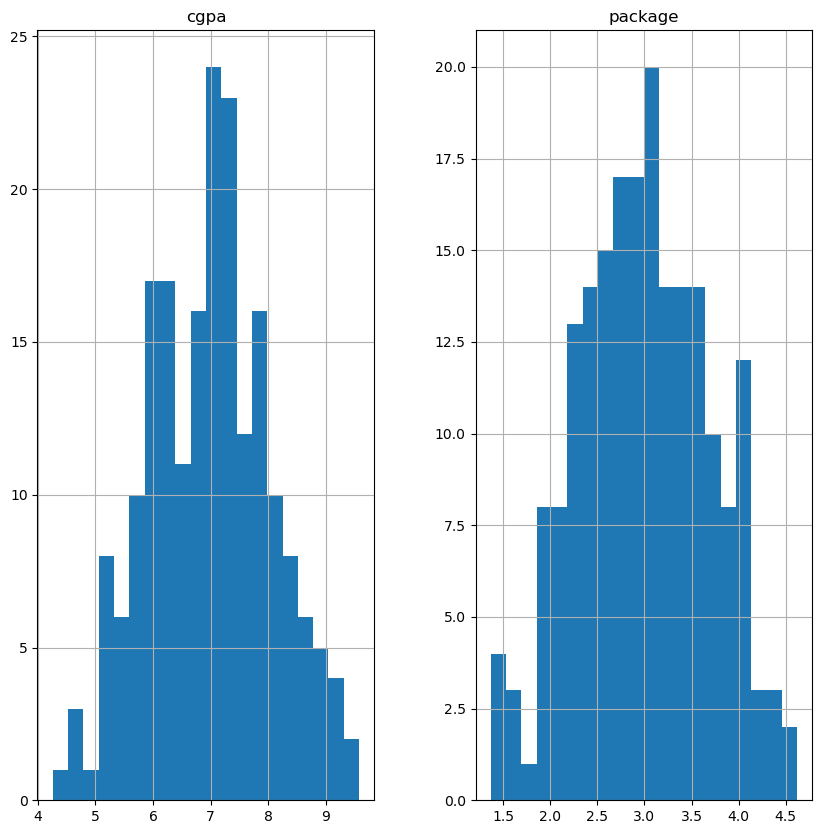

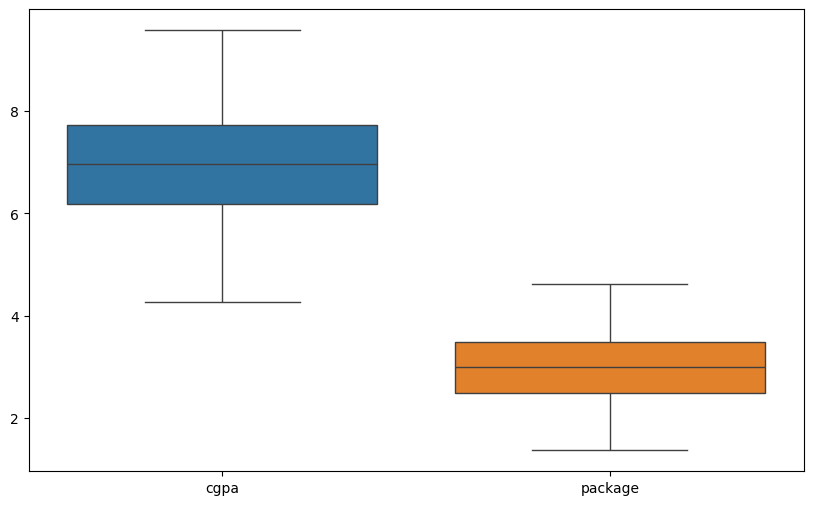

In [40]:
# Histogram of numerical columns
df.hist(figsize=(10, 10), bins=20)
plt.show()

# Boxplot for numerical columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.show()


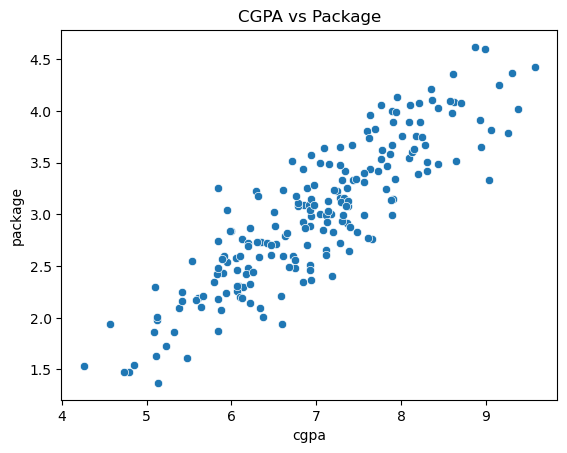

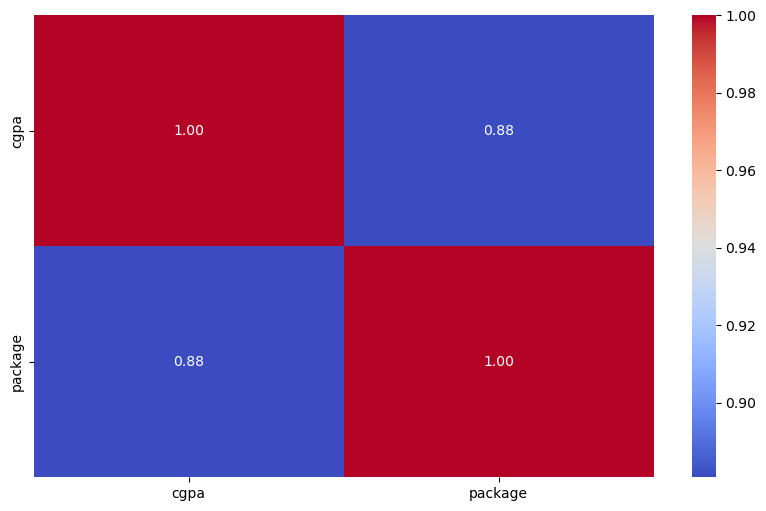

In [42]:
# Scatter plot to explore relationships between CGPA and Package
sns.scatterplot(x='cgpa', y='package', data=df)
plt.title("CGPA vs Package")
plt.show()

# Correlation heatmap for numerical columns
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


In [46]:
# X (features) and y (target)
X = df[['cgpa']] 
y = df['package']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

In [56]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.08417638361329657
R-squared: 0.7730984312051673


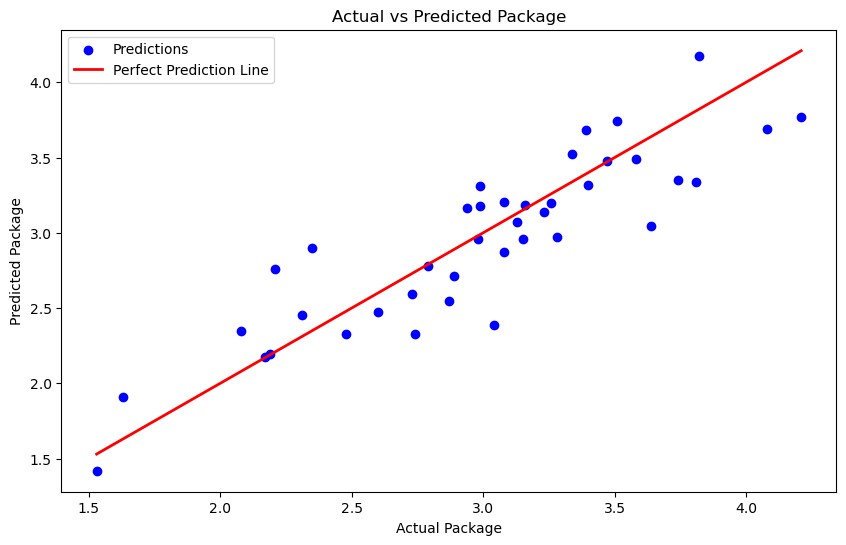

In [58]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction Line')
plt.xlabel('Actual Package')
plt.ylabel('Predicted Package')
plt.title('Actual vs Predicted Package')
plt.legend()
plt.show()

In [62]:
import joblib

In [64]:
joblib.dump(model, 'model.pkl')

['model.pkl']